In [3]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

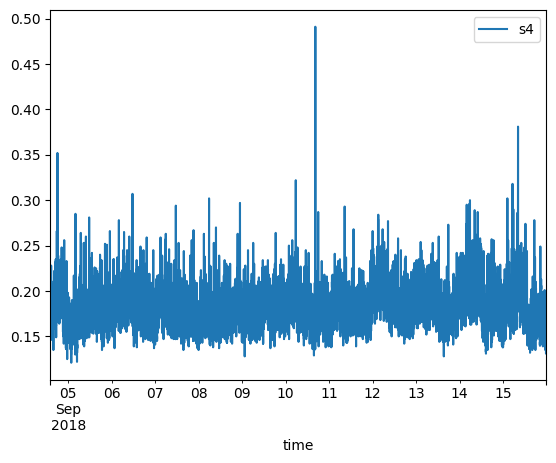

In [4]:
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', na_values=[' ', ''])

data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[data['time_utc']>='2018-09-04 14:10:00']
data = data[data[' svid'] == 131]
data = data[['time_utc', ' s4']]
data.columns = ['time', 's4']
data['s4'] = data['s4'].astype(float)
data.reset_index(drop=True, inplace=True)
data.plot(x='time', y='s4')
data.interpolate('linear')
df = data

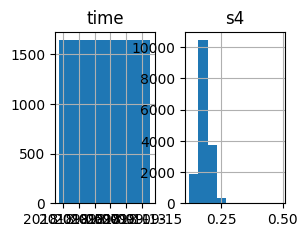

In [5]:
import matplotlib.pyplot as plt
df.hist(figsize=(8,8),layout=(3,5))
plt.show()

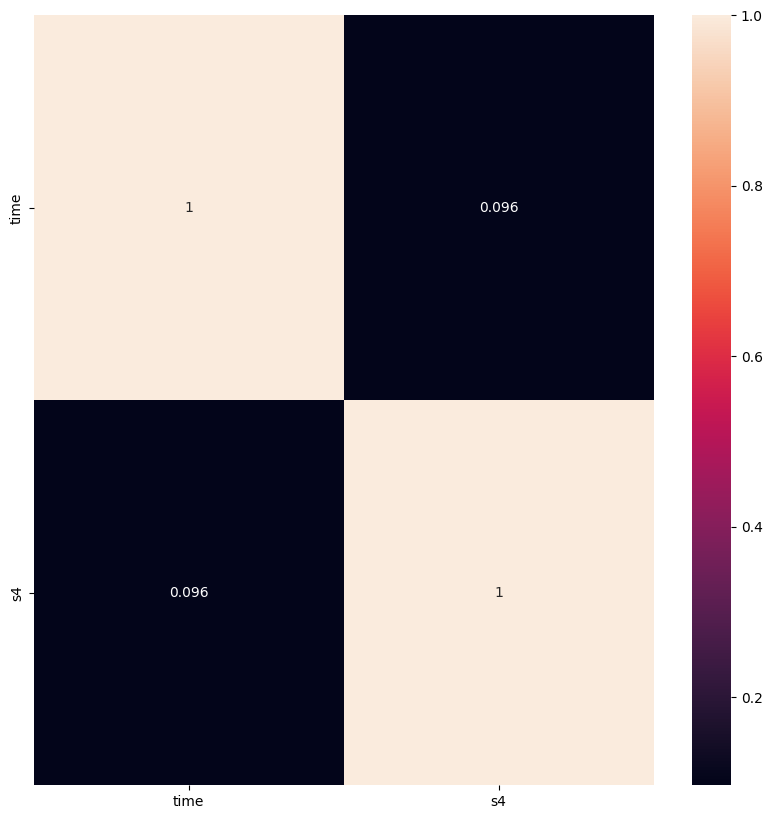

In [6]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
train,val=train_test_split(df)
X,y=train.drop('s4',axis=1),train.s4
train.shape,val.shape,X.shape,y.shape

((12322, 2), (4108, 2), (12322, 1), (12322,))

In [9]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
results1 = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    pipe=Pipeline([('imputer',imputer),('model',model)])
    cv_results = cross_val_score(pipe, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    results1.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.016889 (0.000382)
LASSO: -0.016889 (0.000382)
EN: -0.016889 (0.000382)
KNN: -0.011340 (0.000361)
CART: -0.012989 (0.000353)
SVR: -0.045522 (0.001491)


In [11]:
df1=pd.DataFrame(data=[result.mean() for result in results1],index=names,columns=['Baseline'])
df1

,Baseline
LR,-0.016889
LASSO,-0.016889
EN,-0.016889
KNN,-0.011340
CART,-0.012989
SVR,-0.045522


In [12]:
from sklearn.preprocessing import QuantileTransformer

qt=QuantileTransformer(n_quantiles=341)
imputer=SimpleImputer()

results2 = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    pipe=Pipeline([('imputer',imputer),('qt',qt),('model',model)])
    cv_results = cross_val_score(pipe, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    results2.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.016889 (0.000382)
LASSO: -0.016949 (0.000418)
EN: -0.016949 (0.000418)
KNN: -0.011324 (0.000359)
CART: -0.013099 (0.000382)
SVR: -0.045436 (0.001363)


In [13]:
df2=pd.DataFrame(data=[result.mean() for result in results2],index=names,columns=['QuantileTransformer'])
df2

,QuantileTransformer
LR,-0.016889
LASSO,-0.016949
EN,-0.016949
KNN,-0.011324
CART,-0.013099
SVR,-0.045436


In [14]:
df3=df1.join(df2)
df3

,Baseline,QuantileTransformer
LR,-0.016889,-0.016889
LASSO,-0.016889,-0.016949
EN,-0.016889,-0.016949
KNN,-0.011340,-0.011324
CART,-0.012989,-0.013099
SVR,-0.045522,-0.045436


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

imputer=SimpleImputer()
skb = SelectKBest(score_func=f_classif, k=6)

results3 = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    pipe=Pipeline([('imputer',imputer),('skb',skb),('model',model)])
    cv_results = cross_val_score(pipe, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    results3.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_sele

LR: -0.016889 (0.000382)


/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_sele

LASSO: -0.016889 (0.000382)


/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_sele

EN: -0.016889 (0.000382)


/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_sele

KNN: -0.011340 (0.000361)


/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_sele

CART: -0.012989 (0.000353)
SVR: -0.045522 (0.001491)


/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=6 is greater than n_features=1. All the features will be returned.
  warnings.warn(


In [16]:
df4=pd.DataFrame(data=[result.mean() for result in results3],index=names,columns=['SelectKBest'])
df4

,SelectKBest
LR,-0.016889
LASSO,-0.016889
EN,-0.016889
KNN,-0.011340
CART,-0.012989
SVR,-0.045522


In [17]:
df5=df3.join(df4)
df5

,Baseline,QuantileTransformer,SelectKBest
LR,-0.016889,-0.016889,-0.016889
LASSO,-0.016889,-0.016949,-0.016889
EN,-0.016889,-0.016949,-0.016889
KNN,-0.011340,-0.011324,-0.011340
CART,-0.012989,-0.013099,-0.012989
SVR,-0.045522,-0.045436,-0.045522


In [18]:
X=SimpleImputer().fit_transform(X)

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=kfold)
grid_result = grid.fit(rescaledX, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.011261 using {'n_neighbors': 3}
-0.013006 (0.000321) with: {'n_neighbors': 1}
-0.011261 (0.000404) with: {'n_neighbors': 3}
-0.011351 (0.000383) with: {'n_neighbors': 5}
-0.011512 (0.000349) with: {'n_neighbors': 7}
-0.011828 (0.000325) with: {'n_neighbors': 9}
-0.012099 (0.000352) with: {'n_neighbors': 11}
-0.012408 (0.000351) with: {'n_neighbors': 13}
-0.012712 (0.000346) with: {'n_neighbors': 15}
-0.013014 (0.000334) with: {'n_neighbors': 17}
-0.013279 (0.000350) with: {'n_neighbors': 19}
-0.013512 (0.000360) with: {'n_neighbors': 21}


/home/lemateus/TCC/cintilacao/prophet-venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [19]:
X=SimpleImputer().fit_transform(X)

ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor(n_estimators=10)))
ensembles.append(('ET', ExtraTreesRegressor(n_estimators=10)))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -0.020109 (0.002714)
GBM: -0.014251 (0.000370)
RF: -0.011890 (0.000344)
ET: -0.012563 (0.000329)


In [20]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

X=SimpleImputer().fit_transform(X)



model = GradientBoostingRegressor()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv)
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.491640 using {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}
-0.000706 (0.001149) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
-0.000709 (0.001148) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
-0.000714 (0.001148) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.000189 (0.001128) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.000176 (0.001126) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.000151 (0.001129) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.001298 (0.001117) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.001270 (0.001110) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.001223 (0.001115) with: {'learning_rate': 0.00

In [ ]:
from sklearn.metrics import mean_absolute_error

imputer = SimpleImputer().fit(X)
X = imputer.transform(X)
model = GradientBoostingRegressor(random_state=0, learning_rate=0.1,max_depth=3, n_estimators=500, subsample=0.7)
model.fit(X, y)

X_val,y_val=val.drop('MEDV',axis=1),val.MEDV

X_val = imputer.transform(X_val)
predictions = model.predict(X_val)
print(mean_absolute_error(y_val, predictions))